<a href="https://colab.research.google.com/github/mthsansu/CovidLiterature/blob/main/Code/Graph_from_raw_data_Mat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center><strong><font color="chillipepper">Réseau Wikipédia des auteurs francophones</font></strong></center></h1>
<h5><center><font color="green">Science des réseaux sociaux et économiques <h3><center>


<center>
Maxime Chabriel, Yasmine Houri, Mathis Sansu  

ENSAE 2022
</center>

<h2><center><strong><font color="chillipepper">Analyses</font></strong></center></h2>

# Packages

In [1]:
import pandas as pd
import networkx as nx
from networkx.algorithms import bipartite
import pickle as pkl

# Données

In [38]:
# Lien du repository GitHub pour récupérer les données
git_url = "https://raw.githubusercontent.com/ChabiMax/author_network/main/"
data = pd.read_pickle(git_url+'/Data/raw_data.pkl')

In [39]:
# Passage du dictionnaire sous forme de dataframe
df = pd.DataFrame(data).T
df.head()

,name,link,date_mort,date_naissance,taille_html_article,network_interauteur,poids_liens_interauteur,genres_mentionnes,type,contemporain,poids_contempo_diff_naissance,poids_contempo_annees_communes,auteurs_du_genre,debut_genre,fin_genre
0,Turold,https://fr.wikipedia.org/wiki/Turold,NaN,NaN,73673,[],[],[],auteur,[],[],[],NaN,NaN,NaN
1,Philippe de Thaon,https://fr.wikipedia.org/wiki/Philippe_de_Thaon,NaN,NaN,68910,[],[],[],auteur,[],[],[],NaN,NaN,NaN
2,Benoît de Sainte-Maure,https://fr.wikipedia.org/wiki/Beno%C3%AEt_de_S...,NaN,NaN,83269,[4],[1],[1627],auteur,[],[],[],NaN,NaN,NaN
3,Jean Bodel,https://fr.wikipedia.org/wiki/Jean_Bodel,1165,NaN,73274,"[10, 22]","[1, 1]","[1663, 1691, 1604]",auteur,[],[],[],NaN,NaN,NaN
4,Wace,https://fr.wikipedia.org/wiki/Wace,1174,1100,99714,[6],[2],"[1591, 1662]",auteur,"[5, 6, 7, 9, 10, 11]","[10, 30, 50, 60, 60, 60]","[52, 44, 24, 14, 14, 14]",NaN,NaN,NaN


# Réseau interauteurs : hyperliens auteurs sur les pages auteurs

## Création de la edge list

In [40]:
id = 0 # Initialisation
id_link = id 
link_table = dict()

for source in df.index :
  if df.iloc[id]['type'] == "auteur":
    for i in range(len(df.iloc[id]['network_interauteur'])):
      target = df.iloc[id]['network_interauteur'][i]
      link_table[id_link] = {'source' : source, 'target' : target}
      weight = df.iloc[id]['poids_liens_interauteur'][i]
      link_table[id_link]['weight'] = weight
      if target in df.iloc[id]['contemporain'] :
        index_contemp = df.iloc[id]['contemporain'].index(target)
        contemporain = 1
        diff_naissance = df.iloc[id]['poids_contempo_diff_naissance'][index_contemp]
        annees_communes = df.iloc[id]['poids_contempo_annees_communes'][index_contemp]
      else:
        contemporain = 0
        diff_naissance = 0
        annees_communes = 0
      link_table[id_link]['contemporain'] = contemporain
      link_table[id_link]['diff_naissance'] = diff_naissance
      link_table[id_link]['annees_communes'] = annees_communes
      id_link +=1
    id += 1

In [41]:
edge_links = pd.DataFrame(link_table).T
edge_links.head()

,source,target,weight,contemporain,diff_naissance,annees_communes
0,2,4,1,0,0,0
1,3,10,1,0,0,0
2,3,22,1,0,0,0
3,4,6,2,1,30,44
4,6,4,1,1,30,44


## Réseau complet

In [42]:
# Graph orienté
GraphAuthorLink = nx.from_pandas_edgelist(edge_links, 'source', 'target', edge_attr = True, create_using=nx.DiGraph())

In [43]:
print(nx.info(GraphAuthorLink))

DiGraph with 1250 nodes and 13021 edges


In [50]:
# match nodes of graph with attributes of nodes
df_node = df[df["type"] == "auteur"]
df_node['Node'] = df_node.index
NodeData = df_node.set_index('Node').to_dict('index').items()
GraphAuthorLink.add_nodes_from(NodeData)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [51]:
print(nx.info(GraphAuthorLink))

DiGraph with 1584 nodes and 13021 edges


In [61]:
# Removing isolates
GraphAuthorLink.remove_nodes_from(list(nx.isolates(GraphAuthorLink)))

In [53]:
# Nombre de noeuds
N_nodes = GraphAuthorLink.number_of_nodes()
print(N_nodes)

1584


In [54]:
# Liens sortants
print(GraphAuthorLink.out_degree())
# Liens entrants
print(GraphAuthorLink.in_degree())
# Liens totaux
print(GraphAuthorLink.degree())

[(2, 1), (4, 1), (3, 2), (10, 0), (22, 0), (6, 2), (732, 65), (7, 1), (11, 3), (18, 3), (21, 3), (14, 5), (13, 0), (1, 0), (102, 0), (15, 2), (17, 1), (24, 3), (19, 3), (729, 46), (733, 58), (779, 33), (39, 2), (25, 1), (26, 1), (29, 1), (35, 3), (30, 1), (198, 18), (31, 3), (37, 3), (20, 0), (34, 4), (443, 18), (375, 24), (913, 40), (38, 1), (51, 2), (40, 8), (73, 12), (523, 13), (665, 26), (326, 25), (41, 4), (98, 1), (50, 1), (42, 1), (44, 2), (60, 3), (45, 1), (46, 4), (56, 22), (1255, 3), (1273, 22), (47, 2), (48, 1), (59, 3), (58, 1), (52, 1), (53, 1), (565, 17), (197, 3), (70, 31), (213, 11), (376, 69), (402, 21), (431, 7), (515, 43), (422, 32), (480, 30), (391, 21), (502, 27), (680, 15), (731, 23), (672, 26), (978, 43), (67, 8), (64, 2), (248, 51), (366, 14), (62, 1), (66, 2), (71, 6), (93, 18), (92, 5), (68, 2), (69, 1), (79, 4), (65, 0), (1004, 15), (601, 16), (104, 2), (199, 42), (203, 5), (171, 3), (329, 36), (339, 32), (387, 28), (424, 20), (355, 29), (570, 27), (572, 8), 

In [58]:
# Densité
print(nx.density(GraphAuthorLink))
# Réciprocité globale
print(nx.reciprocity(GraphAuthorLink))
# Réciprocité locale
print(nx.reciprocity(GraphAuthorLink, nodes = GraphAuthorLink.nodes))
# Transitivité
print(nx.transitivity(GraphAuthorLink)) # Coeff de cluster global
print(nx.clustering(GraphAuthorLink)) # Coeff de cluster local
print(nx.average_clustering(GraphAuthorLink)) # Coeff de cluster local moyen

0.005192879521685586
0.5131710314107979
{2: 0.0, 4: 0.5, 3: 0.0, 10: 0.0, 22: 0.0, 6: 0.2222222222222222, 732: 0.6413043478260869, 7: 0.0, 11: 0.6666666666666666, 18: 0.8, 21: 0.8, 14: 0.0, 13: 0.0, 1: 0.0, 102: 0.0, 15: 0.0, 17: 0.6666666666666666, 24: 0.4444444444444444, 19: 0.0, 729: 0.460431654676259, 733: 0.46153846153846156, 779: 0.7792207792207793, 39: 0.8, 25: 0.0, 26: 0.0, 29: 1.0, 35: 0.6666666666666666, 30: 0.0, 198: 0.3, 31: 0.6666666666666666, 37: 0.2857142857142857, 20: 0.0, 34: 0.4, 443: 0.5660377358490566, 375: 0.44155844155844154, 913: 0.8089887640449438, 38: 0.0, 51: 0.5, 40: 0.2, 73: 0.3333333333333333, 523: 0.3333333333333333, 665: 0.10526315789473684, 326: 0.6774193548387096, 41: 0.0, 98: 0.0, 50: 0.0, 42: 0.0, 44: 0.0, 60: 0.0, 45: 0.0, 46: 0.25, 56: 0.21739130434782608, 1255: 0.0, 1273: 0.35, 47: 0.0, 48: 0.0, 59: 0.4, 58: 1.0, 52: 0.0, 53: 0.0, 565: 0.26666666666666666, 197: 0.3076923076923077, 70: 0.21818181818181817, 213: 0.2962962962962963, 376: 0.50925925925

In [65]:
# Cliques
print(list(nx.find_cliques(GraphAuthorLink.to_undirected())))
# Connectivité
print(nx.is_connected(GraphAuthorLink.to_undirected()))
# Connectivité faible
print(nx.is_weakly_connected(GraphAuthorLink))

[[0, 1090], [1, 14], [2, 4, 14], [3, 56], [3, 10], [3, 22], [4, 6], [6, 929], [6, 11, 18, 21], [6, 1524], [6, 1525], [6, 732], [7, 11], [7, 15], [13, 14], [14, 102], [15, 25], [15, 22], [17, 24, 96], [19, 729, 779, 733], [20, 56], [20, 31], [22, 24], [22, 891], [24, 50], [24, 67], [24, 39, 40], [26, 732], [29, 35], [30, 198], [31, 35, 37], [31, 1524], [34, 913], [34, 35], [34, 443], [34, 375], [35, 42], [35, 44], [37, 40], [37, 198], [37, 46, 56], [38, 51], [39, 41], [40, 326, 523], [40, 73], [40, 792, 732], [40, 665], [41, 72, 73], [41, 50], [41, 67, 73], [41, 67, 98], [41, 47], [44, 60], [45, 198], [46, 56, 817], [46, 56, 1445], [46, 1273], [46, 900], [46, 1255], [47, 56], [48, 59], [51, 73], [51, 58], [52, 60], [53, 198], [59, 56], [59, 67, 64], [60, 56], [60, 366, 248], [61, 99], [62, 73], [63, 72], [64, 73, 67], [65, 72, 70], [65, 99], [65, 95], [66, 73, 71], [67, 73, 93], [67, 73, 70], [67, 92, 93], [69, 70], [71, 147], [71, 93, 104, 73], [71, 93, 104, 92], [71, 93, 84, 73], [71,

In [ ]:
# Centralité
print(nx.degree_centrality(GraphAuthorLink))
# Centralité de degré entrant
print(nx.in_degree_centrality(GraphAuthorLink))
# Centralité de degré sortant
print(nx.out_degree_centrality(GraphAuthorLink))

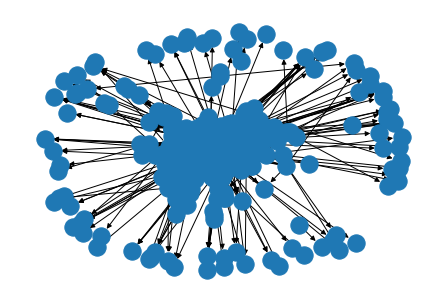

In [9]:
nx.draw(GraphAuthorLink)

### Create genre graph

In [ ]:
id = 0
id_link = id
genre_table = dict()

for source in df.index :
  if df.iloc[id]['type'] == "auteur":
    # print("id: ", id)
    # print("Source: ", source)
    for i in range(len(df.iloc[id]['genres_mentionnes'])):
      # print("i: ", i)
      # print("id_link: ", id_link)
      target = df.iloc[id]['genres_mentionnes'][i]
      # print("Target: ",target)
      genre_table[id_link] = {'source' : source, 'target' : target}
      id_link +=1
    id += 1

In [ ]:
# genre_table

In [ ]:
edge_genres = pd.DataFrame(genre_table).T
edge_genres['weights'] = 1
edge_genres.head()

,source,target,weights
0,2,1626,1
1,3,1661,1
2,3,1690,1
3,3,1603,1
4,4,1590,1


In [ ]:
G_genres = nx.Graph(edge_genres,source="source",target="target")
nx.info(G_genres)

'Graph with 864 nodes and 2025 edges'